In [1]:
'''
In order to uplaod the dataset from Kaggle, we need to upload kaggle.json file to the colab. In order to get and upload .json file, follow the below instructions:
1- Go to your Kaggle profile.
2- Click "Edit profile"
3- In API, section click "Create NEW API Token"
4- .json file will be downloaded to your local.
5- To upload .json file, use below code.
'''
from google.colab import files

kaggle_file = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset


100% 161M/161M [00:01<00:00, 109MB/s] 



In [4]:
!unzip corn-or-maize-leaf-disease-dataset.zip


Archive:  corn-or-maize-leaf-disease-dataset.zip
  inflating: data/Blight/Corn_Blight (1).jpeg  
  inflating: data/Blight/Corn_Blight (1).jpg  
  inflating: data/Blight/Corn_Blight (10).jpg  
  inflating: data/Blight/Corn_Blight (100).jpg  
  inflating: data/Blight/Corn_Blight (1000).JPG  
  inflating: data/Blight/Corn_Blight (1001).JPG  
  inflating: data/Blight/Corn_Blight (1002).JPG  
  inflating: data/Blight/Corn_Blight (1003).JPG  
  inflating: data/Blight/Corn_Blight (1004).JPG  
  inflating: data/Blight/Corn_Blight (1005).JPG  
  inflating: data/Blight/Corn_Blight (1006).JPG  
  inflating: data/Blight/Corn_Blight (1007).JPG  
  inflating: data/Blight/Corn_Blight (1008).JPG  
  inflating: data/Blight/Corn_Blight (1009).JPG  
  inflating: data/Blight/Corn_Blight (101).jpg  
  inflating: data/Blight/Corn_Blight (1010).JPG  
  inflating: data/Blight/Corn_Blight (1011).jpg  
  inflating: data/Blight/Corn_Blight (1012).JPG  
  inflating: data/Blight/Corn_Blight (1013).JPG  
  inflatin

In [5]:
import os
import shutil
data_dir = "/content/data"
print(os.listdir(data_dir))

['Common_Rust', 'Healthy', 'Gray_Leaf_Spot', 'Blight']


In [32]:
train_test = ("train","test")
classes = ("Gray_Leaf_Spot","Healthy","Blight","Common_Rust")
classes
for tt in train_test:
  path = os.path.join(data_dir,tt)
  if not os.path.exists(path):
    os.makedirs(path)
    for cls in classes:
      path_t = os.path.join(path,cls)
      if not os.path.exists(path_t):
        os.makedirs(path_t)

In [7]:
train_size = 0.7
test_size = 0.3
train_dir = "/content/data/train"
test_dir = "/content/data/test"

In [8]:
for cls in classes:
  path = os.path.join(data_dir,cls)
  images_list = os.listdir(path)
  try:
    for images in images_list[:int(len(images_list)*train_size)]:
      train_path = os.path.join(train_dir,cls)
      shutil.move(path+"/"+images,train_path+"/"+images)
    for images in images_list[int(len(images_list)*train_size):]:
      test_path = os.path.join(test_dir,cls)
      shutil.move(path+"/"+images,test_path+"/"+images)
  except:
    print("An error occured")
    pass


In [9]:
#After preparing the data as train and test, we do not need to this folders anymore.
!rm -rf /content/data/Blight
!rm -rf /content/data/Gray_Leaf_Spot
!rm -rf /content/data/Healthy
!rm -rf /content/data/Common_Rust

#Uncomment to download prepared dataset
'''
from google.colab import files 

!zip -r dataset.zip /content/data

files.download('dataset.zip')
'''

"\nfrom google.colab import files \n\n!zip -r dataset.zip /content/data\n\nfiles.download('dataset.zip')\n"

In [10]:
for tt in os.listdir(data_dir):
  for cls in classes:
    path = data_dir+"/"+tt+"/"+cls
    print(f"There are {len(os.listdir(path))} {cls} images in {tt} folder") 
  print("------------------------------------------------------------------")

There are 401 Gray_Leaf_Spot images in train folder
There are 813 Healthy images in train folder
There are 802 Blight images in train folder
There are 914 Common_Rust images in train folder
------------------------------------------------------------------
There are 173 Gray_Leaf_Spot images in test folder
There are 349 Healthy images in test folder
There are 344 Blight images in test folder
There are 392 Common_Rust images in test folder
------------------------------------------------------------------


In [11]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch
import torchvision
from torch.utils.data import random_split
from torchvision.transforms import Resize
from torchvision.transforms import Compose
from torchvision.transforms import *
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [12]:
transform_dict = transforms.Compose([                                   
                                     transforms.Resize((256,256)),                                           
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])
                                                       ]
)

In [13]:
train_dir = "/content/data/train"
dataset = ImageFolder(train_dir,transform=transform_dict)

In [14]:
img, label = dataset[0]
print(img.shape,label)
img

torch.Size([3, 256, 256]) 0


tensor([[[ 1.6324, -0.4054, -0.7650,  ..., -1.5699, -1.4843, -1.3815],
         [ 1.6495, -0.3541, -0.8678,  ..., -1.6042, -1.5185, -1.3987],
         [ 1.6838, -0.2684, -0.8678,  ..., -1.6384, -1.5528, -1.4329],
         ...,
         [ 2.0092,  1.1187,  0.8961,  ..., -1.1760, -1.0733, -0.9192],
         [ 1.9920,  1.1015,  0.9303,  ..., -0.7993, -0.9705, -1.0733],
         [ 2.0092,  1.1529,  0.9474,  ...,  0.3823, -0.3369, -0.8335]],

        [[ 1.9384,  0.1001, -0.0224,  ..., -0.8452, -0.7577, -0.6176],
         [ 1.9559,  0.1352, -0.1275,  ..., -0.8978, -0.7927, -0.6352],
         [ 1.9909,  0.2227, -0.1450,  ..., -0.9328, -0.8277, -0.6877],
         ...,
         [ 2.2360,  1.5882,  1.5532,  ..., -0.7227, -0.6702, -0.5126],
         [ 2.2185,  1.5532,  1.5882,  ..., -0.4601, -0.6877, -0.8452],
         [ 2.2185,  1.5357,  1.5707,  ...,  0.4678, -0.2850, -0.8102]],

        [[ 1.9428, -0.0092, -0.2532,  ..., -1.2119, -1.1770, -1.0898],
         [ 1.9777,  0.0256, -0.3404,  ..., -1

In [15]:
print(dataset.classes)


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [16]:
import matplotlib.pyplot as plt

def show_example(img,label):
  print("Label", dataset.classes[label], "-" + str(label))
  plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Blight -0


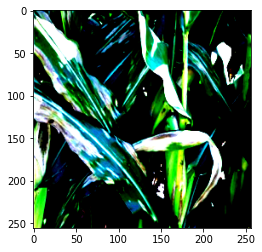

In [17]:
show_example(*dataset[0])


In [18]:
random_seed = 42
torch.manual_seed(random_seed)

In [19]:
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset,[train_size,val_size])
len(train_ds), len(val_ds)

(2430, 500)

In [20]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32

In [21]:
train_dl = DataLoader(train_ds, 
                      batch_size= batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)
val_dl = DataLoader(val_ds,
                    batch_size=batch_size*2,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [22]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# We can look at batches of images from the dataset using the **make_grid** method from torchvision.

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


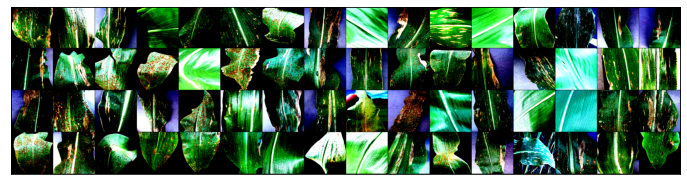

In [23]:
show_batch(val_dl)

In [24]:
model = models.mobilenet_v2(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [25]:
from collections import OrderedDict
# Freeze pretrained model parameters to avoid backpropogating through them
for parameter in model.parameters():
    parameter.requires_grad = False

# Build custom classifier
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(1280, 5000)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(5000, 102)),
                                        ('output', nn.LogSoftmax(dim=1))]))

model.classifier = classifier

In [26]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    val_loss = 0
    accuracy = 0
    for images, labels in iter(validateloader):
        images, labels = images.to('cuda'), labels.to('cuda')
        output = model.forward(images)
        val_loss += criterion(output, labels).item()
        probabilities = torch.exp(output)       
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [27]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [28]:
# Train the classifier
def train_classifier():
    epochs = 15
    steps = 0
    print_every = 40

    model.to('cuda')

    for e in range(epochs):   
        model.train()
        running_loss = 0
        for images, labels in iter(train_dl):  
            steps += 1
            images, labels = images.to('cuda'), labels.to('cuda')
    
            optimizer.zero_grad()
    
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
            if steps % print_every == 0:
            
                model.eval()
            
                # Turn off gradients for validation, saves memory and computations
                with torch.no_grad():
                    validation_loss, accuracy = validation(model, val_dl, criterion)
        
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(validation_loss/len(val_dl)),
                      "Validation Accuracy: {:.3f}".format(accuracy/len(val_dl)))
        
                running_loss = 0
                model.train()
                
train_classifier()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/15..  Training Loss: 0.740..  Validation Loss: 0.686..  Validation Accuracy: 0.827
Epoch: 2/15..  Training Loss: 0.025..  Validation Loss: 0.240..  Validation Accuracy: 0.899
Epoch: 2/15..  Training Loss: 0.284..  Validation Loss: 0.233..  Validation Accuracy: 0.913
Epoch: 3/15..  Training Loss: 0.055..  Validation Loss: 0.367..  Validation Accuracy: 0.888
Epoch: 3/15..  Training Loss: 0.287..  Validation Loss: 0.213..  Validation Accuracy: 0.916
Epoch: 4/15..  Training Loss: 0.168..  Validation Loss: 0.563..  Validation Accuracy: 0.786
Epoch: 4/15..  Training Loss: 0.256..  Validation Loss: 0.236..  Validation Accuracy: 0.912
Epoch: 5/15..  Training Loss: 0.101..  Validation Loss: 0.247..  Validation Accuracy: 0.907
Epoch: 5/15..  Training Loss: 0.233..  Validation Loss: 0.217..  Validation Accuracy: 0.922
Epoch: 6/15..  Training Loss: 0.119..  Validation Loss: 0.243..  Validation Accuracy: 0.905
Epoch: 6/15..  Training Loss: 0.294..  Validation Loss: 0.369..  Validation Accu

In [29]:
testing_transforms = transforms.Compose([transforms.Resize((256,256)),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])

In [30]:
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)

In [31]:
def test_accuracy(model, test_loader):
    # Do validation on the test set
    model.eval()
    model.to('cuda')
    with torch.no_grad():  
        accuracy = 0  
        for images, labels in iter(test_loader): 
            images, labels = images.to('cuda'), labels.to('cuda') 
            
            output = model.forward(images)
            probabilities = torch.exp(output)        
            equality = (labels.data == probabilities.max(dim=1)[1])      
            accuracy += equality.type(torch.FloatTensor).mean()      
        print("Test Accuracy: {}".format(accuracy/len(test_loader)))  
  
        
        
test_accuracy(model, test_loader)

Test Accuracy: 0.9281250238418579
